# Lab | Handling Data Imbalance in Classification Models
For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

### Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. - - Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

    - Scale the features either by using normalizer or a standard scaler.
    - Split the data into a training set and a test set.
    - Fit a logistic regression model on the training data.
    - Check the accuracy on the test data.


**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

---

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/kt/Desktop/Ironhack/Data-Analytics-Ironhack/unit-3/lab-imbalanced-data/customer_churn.csv")
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [5]:
# Change data type of 'totalcharges' from str to float
df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors='coerce')
df['totalcharges'].dtypes

dtype('float64')

## Imbalaned Data

No     5174
Yes    1869
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='count'>

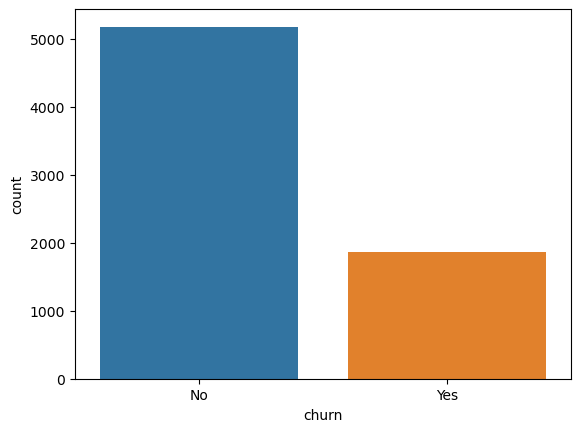

In [6]:
# Check target --> we have imbalanced data
print(df["churn"].value_counts())

sns.countplot(df["churn"])

- We see imbalanced data with: 
    - majority "No" class 73%
    - minority "Yes" class 27%

In [7]:
# Check nulls and empty spaces in the dataset
print("Sum of NaN: ", "\n", df.isna().sum(), "\n")
print("Sum of Empty spaces:", "\n", df.eq(" ").sum())

Sum of NaN:  
 customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64 

Sum of Empty spaces: 
 customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dt

- We have 11 nulls in "totalcharges" column

In [8]:
# Check those NaNs, see which class of Churn they are in
nan = df[df["totalcharges"].isna()]
nan["churn"].value_counts()

No    11
Name: churn, dtype: int64

- All of the NaNs are presented in the class "No" and they are < 0.5% of the data
- Therefore, we can simply drop 11 rows of NaN

In [9]:
# drop na
df = df.dropna()
len(df)

7032

## Define Features

In [10]:
X = df[["tenure", "seniorcitizen", "monthlycharges", "totalcharges"]]
X.head()

,tenure,seniorcitizen,monthlycharges,totalcharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65


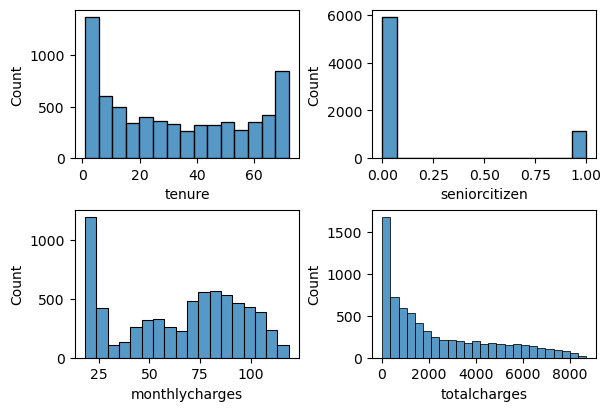

In [11]:
fig = plt.figure(figsize = (6, 4), constrained_layout = True)
for i, column in enumerate(X.columns):
    fig.add_subplot(2, 2, i + 1) 
    sns.histplot(X[column])

In [12]:
#standardise the numerical data 
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)

X_standardized.head()

,tenure,seniorcitizen,monthlycharges,totalcharges
0,-1.280248,-0.440327,-1.161694,-0.994194
1,0.064303,-0.440327,-0.260878,-0.173740
2,-1.239504,-0.440327,-0.363923,-0.959649
3,0.512486,-0.440327,-0.747850,-0.195248
4,-1.239504,-0.440327,0.196178,-0.940457


In [13]:
y = df["churn"]
# y

## Baseline Model

In [14]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)
# print(len(X_train))
# print(len(y_train))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1033
         Yes       0.62      0.44      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



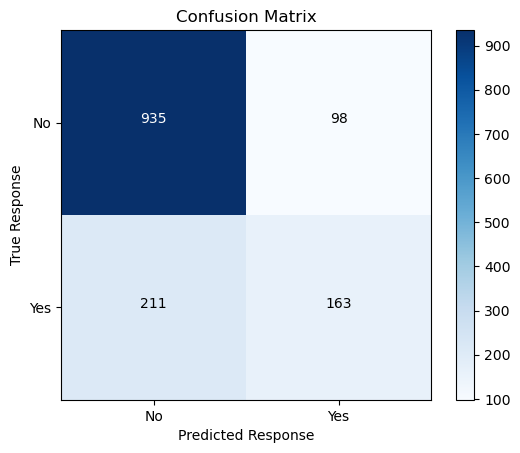

In [15]:
def logreg_train_test(X_train, y_train):

    # Train-test split 
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model 
    classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
    y_pred = classification.predict(X_test)
    
    
    # create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # plot the confusion matrix as a heatmap
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Response')
    plt.ylabel('True Response')
    plt.xticks([0,1], ['No', 'Yes'])
    plt.yticks([0,1], ['No', 'Yes'])

    # add the values of the confusion matrix to the heatmap
    thresh = cm.max() / 2.
    for i, j in ((0, 0), (0, 1), (1, 0), (1, 1)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    print(classification_report(y_test, y_pred))
    plt.show()

    
logreg_train_test(X_train, y_train)

### Result

- The baseline model predicts true positive (precision) for "No" 82% while predicts "Yes" 62%. 
- And it is consistent with the recall metric, for the "No" prediction. When the sample is "No" we can trust this model to predict correctly about 91%.
- However, if the sample is "Yes" we can trust this model only about 44% to predict correctly. This tells us that there are too many false negative predictions.


### What's next?
- We are aiming for a model that predicts both classes correctly and simultaneously. 
- The event of high precision and/or recall scores in one class and low in another because of imbalanced data.
- We can improve the model by using machine learning algorithms to manage the imbalanced- into balanced data.


<div class="alert alert-block alert-info">
    <h2>Managing Imbalanced Data & Improving the Classification Model</h2>
    </div>

## SMOTE

- Oversampling data by
    - Picking a point from the minority class
    - Computing the k-nearest neighbors (for some pre-specified k) for this point
    - Adding k new points somewhere between the chosen point and each of its neighbors
    

Read more:
- [SMOTE explained for noobs – Synthetic Minority Over-sampling TEchnique line by line](https://rikunert.com/smote_explained)

Oversampling with SMOTE: 
 Yes    4130
No     4130
Name: churn, dtype: int64 

Origin data: 
 No     5163
Yes    1869
Name: churn, dtype: int64 

              precision    recall  f1-score   support

          No       0.88      0.71      0.79      1033
         Yes       0.48      0.73      0.58       374

    accuracy                           0.72      1407
   macro avg       0.68      0.72      0.68      1407
weighted avg       0.77      0.72      0.73      1407



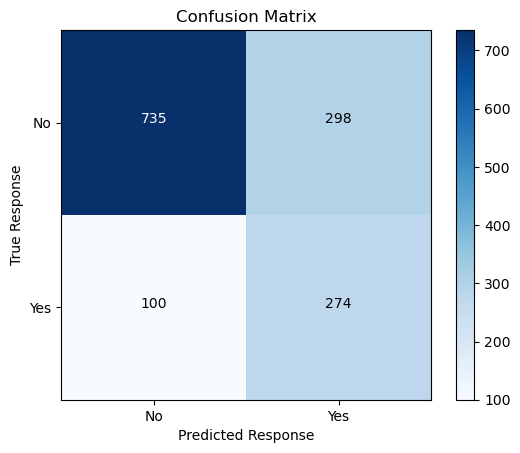

In [16]:
from imblearn.over_sampling import SMOTE
  
# Resampling with SMOTE
sm = SMOTE(random_state = 42)
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
print("Oversampling with SMOTE:", "\n", y_train_smt.value_counts(), "\n")
print("Origin data:", "\n", y.value_counts(), "\n")

# calling the logistic regression model & check the result
logreg_train_test(X_train_smt, y_train_smt)

### Result

- The SMOTE model predicts true positive (precision) for "No" 88% while predicts "Yes" 48%. From here, we see that baseline model predicted "Yes" better than SMOTE.
- However, when the sample is "No" we can trust this model to predict correctly about 71% and for "Yes" is 73%. Which is better than baseline model. 
- With this Recall shows that there are less false negative predictions compared to the baseline model.

## TomekLinks

Removing the instances of the majority class of each pair by comparing the close instances between two classes.  

This method increases the space between the two classes, facilitating the classification process.

Undersampling with TomekLinks: 
 No     3729
Yes    1495
Name: churn, dtype: int64 

Origin data: 
 No     5163
Yes    1869
Name: churn, dtype: int64 

              precision    recall  f1-score   support

          No       0.83      0.87      0.85      1033
         Yes       0.59      0.52      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



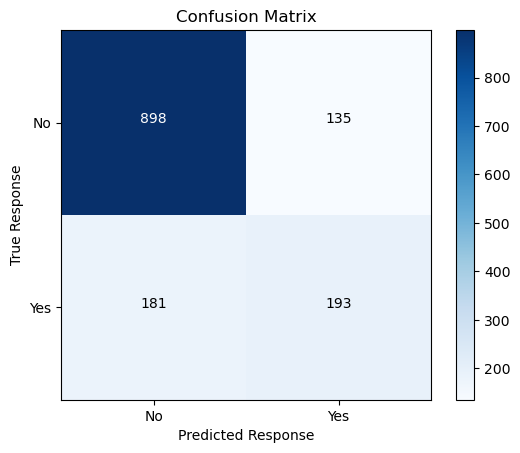

In [17]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X_train, y_train)

print("Undersampling with TomekLinks:", "\n", y_tl.value_counts(), "\n")
print("Origin data:", "\n", y.value_counts(), "\n")

# calling the logistic regression model & check the result
logreg_train_test(X_tl, y_tl)

### Result

- This model predicts "No" class with high Precision and Recall
- However, it predicts "Yes" class with only about 59% Precision and 52% Recall   


## Over- and undersampling using Imblearn RandomUnderSampler & RandomOverSampler

## Oversampling

Oversampling with Imblearn: 
 Yes    4130
No     4130
Name: churn, dtype: int64 

Origin data: 
 No     5163
Yes    1869
Name: churn, dtype: int64 

              precision    recall  f1-score   support

          No       0.88      0.71      0.79      1033
         Yes       0.48      0.73      0.58       374

    accuracy                           0.72      1407
   macro avg       0.68      0.72      0.68      1407
weighted avg       0.77      0.72      0.73      1407



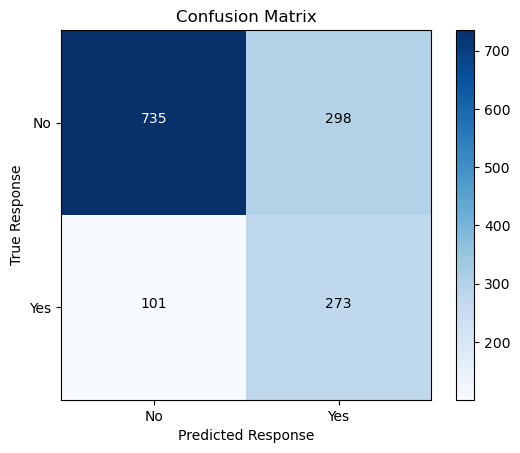

In [18]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print("Oversampling with Imblearn:", "\n", y_ros.value_counts(), "\n")
print("Origin data:", "\n", y.value_counts(), "\n")

# calling the logistic regression model & check the result
logreg_train_test(X_ros, y_ros)

## Undersampling

Undersampling with Imlearn: 
 No     1495
Yes    1495
Name: churn, dtype: int64 

Origin data: 
 No     5163
Yes    1869
Name: churn, dtype: int64 

              precision    recall  f1-score   support

          No       0.88      0.71      0.79      1033
         Yes       0.48      0.73      0.58       374

    accuracy                           0.72      1407
   macro avg       0.68      0.72      0.68      1407
weighted avg       0.77      0.72      0.73      1407



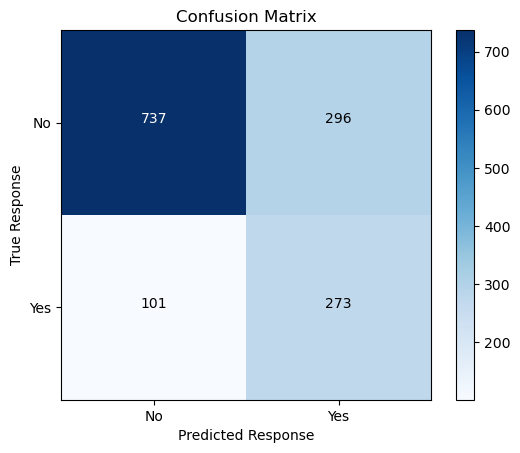

In [19]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print("Undersampling with Imlearn:", "\n", y_rus.value_counts(), "\n")
print("Origin data:", "\n", y.value_counts(), "\n")

# calling the logistic regression model & check the result
logreg_train_test(X_rus, y_rus)

### Result
- Both models: OverSampling and UnderSampling predict both classes of Churn (yes and no) similar to the SMOTE method.
- While the models highly accurate predict true positive in the "No" class (88% precision), they predict 48% of true positives in the "Yes" class (52% are false positive).
- With Recall predict 71% in "No" and 73% in "Yes" class. They predict fewer false negatives compared to the baseline model.




<div class="alert alert-block alert-success">
<h2>Discussion & Conclusion</h2> 
</div>

## Discussion


- Among the models we tested, they predicted the "No" class well but we want to be able to predict the "Yes" as good as the "No" class.
- Therefore, focussing on the "Yes" class, the result showed that

    - SMOTE, OverSampler, and UnderSampler methods predicted true negatives very well with 73% (recall) and true positives with 48% (precision)
    
    - TomekLinks predicted true negatives with 52% (recall) and true positives with 59% (precision)

    - And the baseline model predicted true negatives with 44% (recall) and true positives with 62% (precision)

They provided different strong points.  
    
    
## Conclusion    


Depends on which problem/question/challenge we are facing:
- In most business cases, we tend to focus more on predicting true positives. 
    
    Therefore, in this case, we found the baseline and secondly, the TomekLinks model would be the appropriate method for this dataset. Because they predicted true positive best among the methods.
    
    
- In the medical field, on the other hand, e.g. for creating a tool to predict a disease in the screen test for example. We focus on both equally but we want to screen positive cases more (--> sensitivity/recall <--) because we don't want to miss out on the true positive cases. 
    
    That when a person has a disease, he/she should be able to have a chance to get medical attention in the early stage. 
    
    Plus in some cases, e.g. detecting (deadly) infectious diseases, it is more important to have high sensitivity test otherwise, a person who has the disease can spread the disease if he/she got a false negative (undetected). 
    
    Therefore, getting a false positive has a lower impact compared to a false negative because, in the process of diagnosis, we always have the process/steps/tests after the screening to exclude the cases. 
    
    But after all, depending on the question/problem as we discussed in the first line.


### For this dataset

- We came to the conclusion that for this dataset, **baseline model would be the appropriate method to predict Churn**. Because it predicted true positive best among the methods. 

- And the **second best is the TomekLinks method**.

In [20]:
#### END OF THE LAB & THANK YOU!!! ❤️ ####